In [ ]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import funs.helpers_3 as he
from xgboost import XGBRegressor
np.random.seed(2025)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_pickle("../data/outputs/2.feature_engineering/train_selected.pkl")
test=pd.read_pickle("../data/outputs/2.feature_engineering/test_selected.pkl")

# Train tuned models 

In [ ]:
import json
with open('../data/outputs/3.models/xgb_params.json') as f:
    xgb_params = json.load(f)
with open('../data/outputs/3.models/ada_params.json') as f:
    ada_params = json.load(f)
with open('../data/outputs/3.models/lstm_params.json') as f:
    lstm_params = json.load(f)
with open('../data/outputs/3.models/lr_params.json') as f:
    lr_params = json.load(f)

In [ ]:
xgb_model = XGBRegressor(**xgb_params)

/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_34403/2707128605.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='feature', data=weight_df, palette='Blues_r', ax=axes[0])
/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_34403/2707128605.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gain', y='feature', data=gain_df, palette='Oranges_r', ax=axes[1])


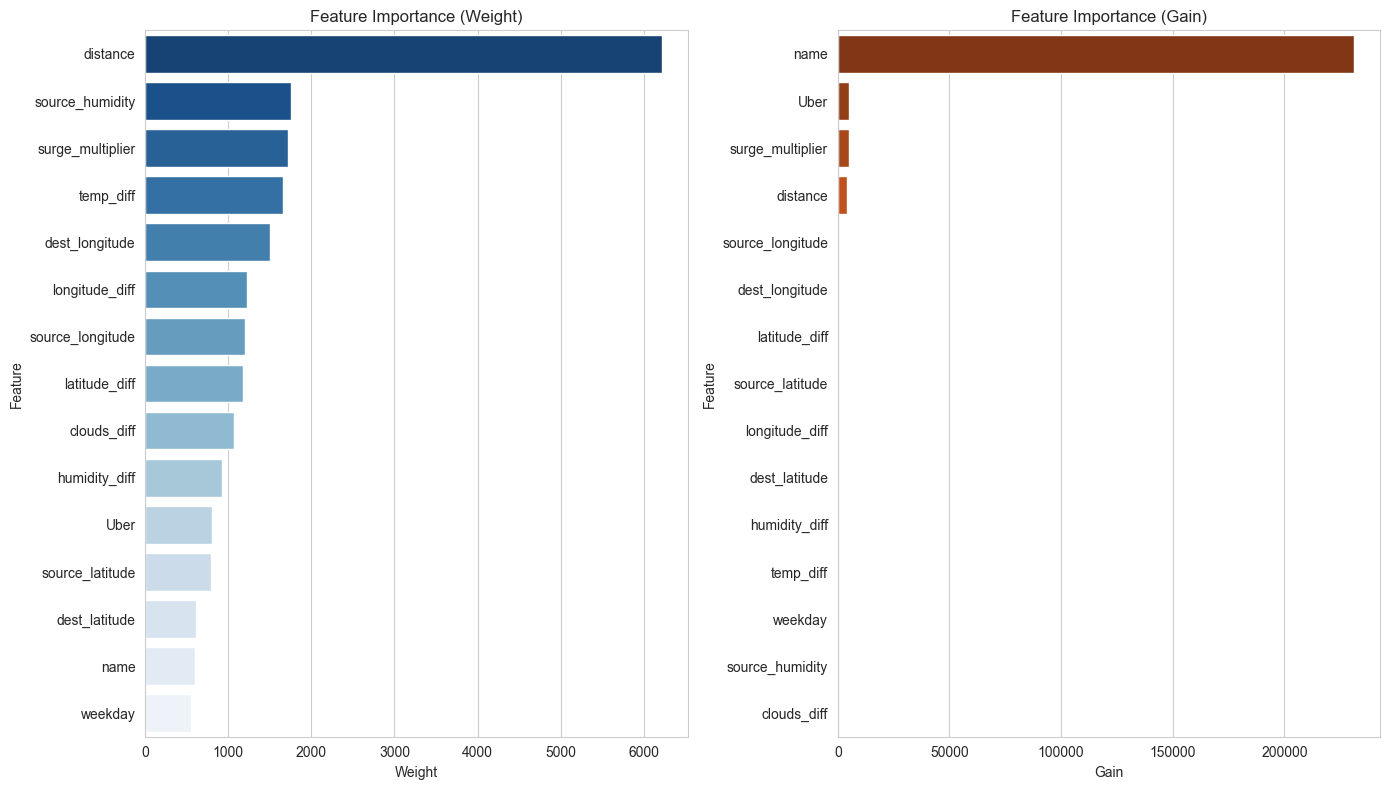

In [ ]:
xgb_model.fit(train.drop(columns=['price']), train['price'])

booster = xgb_model.get_booster()
weight_importance = booster.get_score(importance_type='weight')
gain_importance = booster.get_score(importance_type='gain')

weight_df = pd.DataFrame(list(weight_importance.items()), columns=['feature', 'weight']).sort_values(by='weight', ascending=False)
gain_df = pd.DataFrame(list(gain_importance.items()), columns=['feature', 'gain']).sort_values(by='gain', ascending=False)

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
sns.barplot(x='weight', y='feature', data=weight_df, palette='Blues_r', ax=axes[0])
axes[0].set_title('Feature Importance (Weight)')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Feature')

sns.barplot(x='gain', y='feature', data=gain_df, palette='Oranges_r', ax=axes[1])
axes[1].set_title('Feature Importance (Gain)')
axes[1].set_xlabel('Gain')
axes[1].set_ylabel('Feature')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
eval_params = {
    'target':'price',
    'scoring':"neg_mean_squared_error"
}
results = he.eval_best_models(train,test,lr_params,ada_params,xgb_params,eval_params)

In [ ]:
df = pd.DataFrame(results, index=[0]).T.reset_index()
df[['Model', 'Set', 'Measure']] = df['index'].str.split('_', expand=True)
df = df.drop(columns=['index']).rename(columns={0: 'Value'})
df = df[['Model', 'Set', 'Measure', 'Value']]

In [ ]:
df

,Model,Set,Measure,Value
0,xgb,train,mse,2.570012
1,xgb,train,mae,1.041213
2,xgb,train,r2,0.970436
3,xgb,train,mape,7.769970
4,xgb,test,mse,2.675275
5,xgb,test,mae,1.061539
6,xgb,test,r2,0.969217
7,xgb,test,mape,7.884606
8,lr,train,mse,12.415643
9,lr,train,mae,2.752480


In [ ]:
import importlib
importlib.reload(he)
import funs.helpers_3 as he

In [ ]:
lstm_res = he._train_evaluate_lstm(
    x_train_fold=train.sort_index().drop(columns='price').values,
    y_train_fold=train.sort_index()['price'].values,
    x_val_fold=test.sort_index().drop(columns='price').values,
    y_val_fold=test.sort_index()['price'].values,
    params=lstm_params,
    many_measures=True
)

Epoch 1/11


/Users/anfrejter/Documents/GitHub/uber_lyft_price_prediction/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7941/7941 ━━━━━━━━━━━━━━━━━━━━ 6s 590us/step - loss: 24.2269
Epoch 2/11
7941/7941 ━━━━━━━━━━━━━━━━━━━━ 5s 569us/step - loss: 3.7874
Epoch 3/11
7941/7941 ━━━━━━━━━━━━━━━━━━━━ 4s 563us/step - loss: 3.5263
Epoch 4/11
7941/7941 ━━━━━━━━━━━━━━━━━━━━ 5s 573us/step - loss: 3.3829
Epoch 5/11
7941/7941 ━━━━━━━━━━━━━━━━━━━━ 4s 564us/step - loss: 3.3146
Epoch 6/11
7941/7941 ━━━━━━━━━━━━━━━━━━━━ 4s 562us/step - loss: 3.3125
Epoch 7/11
7941/7941 ━━━━━━━━━━━━━━━━━━━━ 5s 565us/step - loss: 3.2398
Epoch 8/11
7941/7941 ━━━━━━━━━━━━━━━━━━━━ 4s 558us/step - loss: 3.2018
Epoch 9/11
7941/7941 ━━━━━━━━━━━━━━━━━━━━ 4s 559us/step - loss: 3.2019
Epoch 10/11
7941/7941 ━━━━━━━━━━━━━━━━━━━━ 4s 564us/step - loss: 3.2151
Epoch 11/11
7941/7941 ━━━━━━━━━━━━━━━━━━━━ 4s 557us/step - loss: 3.1702
3971/3971 ━━━━━━━━━━━━━━━━━━━━ 1s 269us/step
15882/15882 ━━━━━━━━━━━━━━━━━━━━ 4s 250us/step


In [ ]:
lstm_res

{'mse_test': np.float64(3.0600221807293044),
 'mse_train': np.float64(3.1011789611461498),
 'mae_test': np.float64(1.1865431810084222),
 'mae_train': np.float64(1.1880939230869052),
 'r2_test': 0.9647896392090698,
 'r2_train': 0.9643254399849106,
 'mape_test': np.float64(8.815348819657027),
 'mape_train': np.float64(8.809376902956279)}

In [ ]:
df2=pd.DataFrame({
    'Model':['lstm' for x,y in lstm_res.items()],
    'Set':[x.split('_')[1] for x,y in lstm_res.items()],
    'Measure':[x.split('_')[0] for x,y in lstm_res.items()],
    'Value':[y for x,y in lstm_res.items()]
 })

In [ ]:
df2

,Model,Set,Measure,Value
0,lstm,test,mse,3.060022
1,lstm,train,mse,3.101179
2,lstm,test,mae,1.186543
3,lstm,train,mae,1.188094
4,lstm,test,r2,0.964790
5,lstm,train,r2,0.964325
6,lstm,test,mape,8.815349
7,lstm,train,mape,8.809377


In [ ]:
df

,Model,Set,Measure,Value
0,xgb,train,mse,2.570012
1,xgb,train,mae,1.041213
2,xgb,train,r2,0.970436
3,xgb,train,mape,7.769970
4,xgb,test,mse,2.675275
5,xgb,test,mae,1.061539
6,xgb,test,r2,0.969217
7,xgb,test,mape,7.884606
8,lr,train,mse,12.415643
9,lr,train,mae,2.752480


In [ ]:
results=pd.concat([df,df2]).sort_values(by='Value', ascending=True)
results['Model']=results['Model'].str.upper()
results['Measure']=results['Measure'].str.upper()

In [ ]:
results

,Model,Set,Measure,Value
22,ADA,test,R2,0.853928
18,ADA,train,R2,0.854069
10,LR,train,R2,0.857176
14,LR,test,R2,0.857661
5,LSTM,train,R2,0.964325
4,LSTM,test,R2,0.964790
6,XGB,test,R2,0.969217
2,XGB,train,R2,0.970436
1,XGB,train,MAE,1.041213
5,XGB,test,MAE,1.061539


<Figure size 1000x600 with 0 Axes>

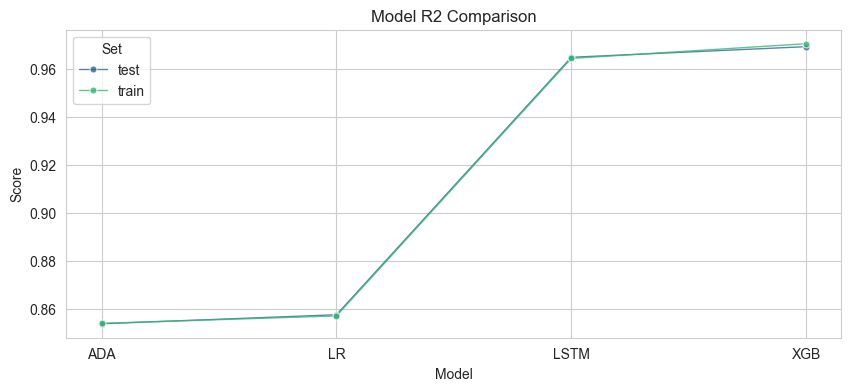

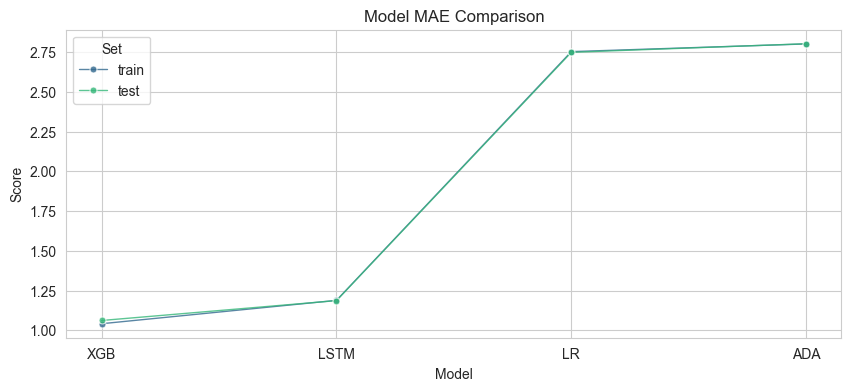

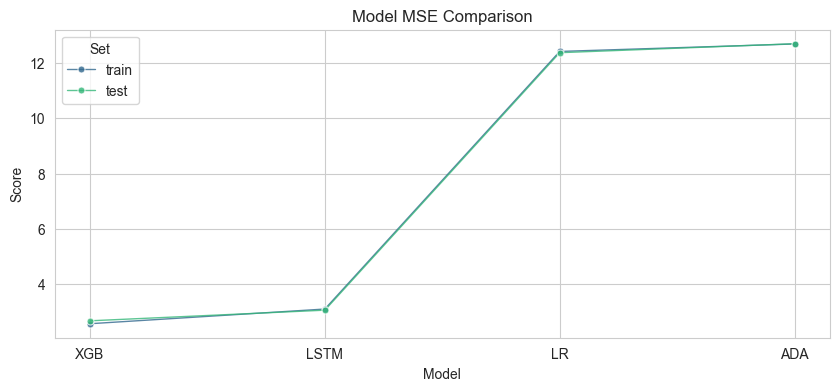

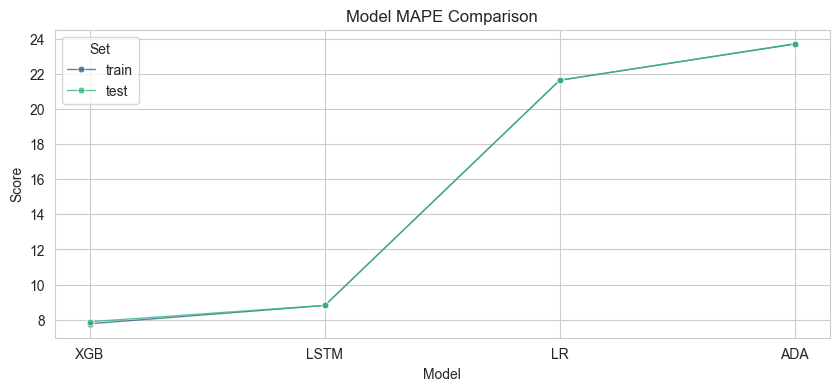

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a grouped barplot
for measure in results.Measure.unique():
    sns.set_style("whitegrid")
    plt.figure(figsize=(10,4))
    sns.lineplot(data=results.query(f"Measure == '{measure}'"),
                x="Model", y="Value", hue="Set", palette="viridis", marker='o', markersize=5,alpha=0.8,linewidth=1)
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.title(f"Model {measure.upper()} Comparison")
    plt.legend(title="Set")
    plt.show()

In [ ]:
pivot_df = results.pivot_table(index=['Model', 'Set'], columns='Measure', values='Value', aggfunc='first')
pivot_df = pivot_df.reset_index()

In [ ]:
pivot_df

Measure,Model,Set,MAE,MAPE,MSE,R2
0,ADA,test,2.802156,23.713661,12.694658,0.853928
1,ADA,train,2.800874,23.690125,12.685708,0.854069
2,LR,test,2.748069,21.631680,12.370195,0.857661
3,LR,train,2.752480,21.635557,12.415643,0.857176
4,LSTM,test,1.186543,8.815349,3.060022,0.964790
5,LSTM,train,1.188094,8.809377,3.101179,0.964325
6,XGB,test,1.061539,7.884606,2.675275,0.969217
7,XGB,train,1.041213,7.769970,2.570012,0.970436
